In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

1cc89202e555079b554803092d2bff0b


In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
total_cities

624

In [3]:
weather_results = []

print('Beginning Data Retrieval')     
print('-----------------------------')
for i in range(0, total_cities):
    lat_long = lat_lngs[i]
    lat = lat_long[0]
    long = lat_long[1]
    city = cities[i]
    print(f'Processing Record {i} | {city} at {lat}, {long}')
    time.sleep(1.1)
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={long}&APPID={api_key}')
    if response.status_code == 200:
        json = response.json()
        temp_max = json['main']['temp_max']
        humidity = json['main']['humidity']
        wind_speed = json['wind']['speed']
        cloudiness = json['clouds']['all']
        latitude = json['coord']['lat']
        longitude = json['coord']['lon']
        country = json['sys'].get('country', 'N/A')
        dt = json['dt']
        weather_results.append({ 'city': city, 'cloudiness': cloudiness, 'country': country, 'date': dt, 'humidity': humidity, 'lat': latitude, 'lng': longitude, 'max_temp': temp_max, 'max_speed': wind_speed})
    else:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')
                            

Beginning Data Retrieval
-----------------------------
Processing Record 0 | sisimiut at 65.9636663344055, -56.607643122413506
Processing Record 1 | barrow at 88.54604061352512, -154.61719957965354
Processing Record 2 | albany at -44.706065355988635, 116.73731113851846
Processing Record 3 | gniezno at 52.61683433269113, 17.573732142530105
Processing Record 4 | mrirt at 32.35360923731048, -5.607862838829988
Processing Record 5 | coruripe at -13.836050105144366, -31.980883320217515
Processing Record 6 | jamestown at -39.9217807547379, -14.929916878007049
Processing Record 7 | ixtapa at 1.5883054163139718, -110.27741034350292
Processing Record 8 | hobart at -54.741948645755336, 146.1903731436944
Processing Record 9 | hithadhoo at -6.937659498411847, 81.59720698238817
Processing Record 10 | susurluk at 39.52904362191373, 27.949813961060244
Processing Record 11 | avarua at -33.93889956213604, -167.36332811583316
Processing Record 12 | busselton at -74.9841934879662, 88.19902503461299
Proces

Processing Record 111 | constantine at 44.21359110462333, -176.79724295642043
Processing Record 112 | acushnet at -78.58014653995087, 43.11966139050179
Processing Record 113 | dingle at 83.35131488610008, 113.22771574609561
Processing Record 114 | tasbuget at 51.61154354393619, 41.131483665270224
Processing Record 115 | tura at 15.139089034621733, -1.2730311512773085
Processing Record 116 | nicoya at -79.04251147629155, -138.2519213626266
Processing Record 117 | saint-joseph at 47.56706228894882, 115.94252936892576
Processing Record 118 | lumby at 59.48064206378086, 161.85372724754717
Processing Record 119 | yellowknife at -68.30682787651263, -116.02452074050814
Processing Record 120 | pevek at 39.673382379372725, -34.452487202352614
Processing Record 121 | faanui at -1.29315235329598, 130.7587615200162
Processing Record 122 | vila franca do campo at 49.20794808009438, 4.831029333853422
Processing Record 123 | basco at 55.81108222718723, -178.94344371953903
Processing Record 124 | alme

Processing Record 221 | pekan at 46.489208868416426, 33.139074464290616
Processing Record 222 | souris at -64.4398534523259, -173.87050325265247
Processing Record 223 | vorukh at 87.9542847704449, -104.5257471861099
Processing Record 224 | emerald at 61.69071613124649, 168.4759264403943
Processing Record 225 | ahuimanu at 16.11111768068909, -18.21199342664019
Processing Record 226 | kungurtug at -8.052559420425041, 84.40072220092708
Processing Record 227 | myre at -16.676220694718396, -39.23645891107358
Processing Record 228 | kindu at -54.54098247795568, 62.349344859917494
Processing Record 229 | bonthe at 49.42203868337174, 51.142496451445425
Processing Record 230 | rungata at -23.084718364574698, 85.6375395820271
Processing Record 231 | guapore at 65.76780734324512, -154.19919312670697
Processing Record 232 | chipinge at -1.736337951211084, 103.3783751736566
Processing Record 233 | yavoriv at -53.90839414506663, 72.80827269498607
Processing Record 234 | ferme-neuve at 40.82877323117

Processing Record 331 | laguna at -29.131479564718653, -34.90778136048715
Processing Record 332 | tandalti at 83.21329032442594, 32.120475924139896
Processing Record 333 | bathsheba at -63.32545404575304, -135.53548042427227
Processing Record 334 | touros at -16.336771786263967, 72.85009661882813
Processing Record 335 | korla at 21.943755921525167, 20.429423085345945
Processing Record 336 | banda aceh at -81.14545062299334, 54.96363479851536
Processing Record 337 | kutum at -32.034019833198855, -7.149457444559516
Processing Record 338 | maniitsoq at -4.187258293081129, -139.7694095629484
Processing Record 339 | khudumelapye at 76.91563548744901, -42.61692463304607
Processing Record 340 | aklavik at 78.46021653283051, -65.8619982099175
Processing Record 341 | libertador general san martin at 17.590206462758204, 131.9064282286829
Processing Record 342 | coos bay at -74.93255375962298, -94.67317672942141
Processing Record 343 | marsa matruh at -80.27099382766109, -34.33117588080657
Proces

Processing Record 441 | muros at 40.356902716921866, -159.0051886020374
Processing Record 442 | ritchie at -88.151634560663, 80.00613930414562
Processing Record 443 | soe at 62.462612369443264, -65.59823974230706
Processing Record 444 | balkhash at -50.887205402481, -59.76021348942987
Processing Record 445 | orlik at 72.3435375192243, -146.83129116038262
Processing Record 446 | acapulco at 61.1780982345073, -145.3243025258075
Processing Record 447 | kichmengskiy gorodok at -78.47916072407529, -119.96263225314877
Processing Record 448 | meadow lake at -0.7571350509504526, -53.888292180911535
Processing Record 449 | pangai at -50.86222849434478, 73.66050817922098
Processing Record 450 | tateyama at 77.89500337744613, -15.038763287236492
Processing Record 451 | adrar at -86.68262508835434, 56.63170504485532
Processing Record 452 | mys shmidta at -62.65280699428301, -17.144053780972968
Processing Record 453 | vaitupu at 16.284229273926343, 11.064369671761625
Processing Record 454 | ayan at

Processing Record 551 | serov at 10.85917146216211, 167.49664686477234
Processing Record 552 | jiutai at -74.50667436174912, 177.93121003838093
Processing Record 553 | worthing at -59.60440920145044, -29.33735261703947
Processing Record 554 | toftir at 19.639445569912922, 27.437059833658196
Processing Record 555 | vitimskiy at 41.7903128714305, 12.732335295727609
Processing Record 556 | tautira at -48.86034551368435, 54.831832584003905
Processing Record 557 | kovdor at 36.18028138265596, -53.15050032326242
Processing Record 558 | mana at 62.35419746761829, -168.09807282588548
Processing Record 559 | vydrino at 9.343875752042138, -150.17575388250583
Processing Record 560 | upata at -10.436400069255512, -25.175133239463094
Processing Record 561 | geraldton at 72.46458061028241, 3.184058475856432
Processing Record 562 | cootamundra at -6.788231778871776, 170.8098848476485
Processing Record 563 | ugoofaaru at 84.08552516249071, -52.56257193733103
Processing Record 564 | loikaw at -5.670270

In [4]:
with open(output_data_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

    # Write the second row
    for weather_dictionary in weather_results:
        csvwriter.writerow([weather_dictionary['city'], weather_dictionary['cloudiness'], weather_dictionary['country'], weather_dictionary['date'], weather_dictionary['humidity'], weather_dictionary['lat'], weather_dictionary['lng'], weather_dictionary['max_temp'], weather_dictionary['max_speed']])


In [5]:
weather_df = pd.DataFrame(weather_results)
weather_df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_speed,max_temp
0,sisimiut,81,GL,1570484586,68,65.96,-56.61,11.30,39.02
1,barrow,100,N/A,1570484588,96,88.55,-154.62,9.69,22.16
2,albany,100,N/A,1570484589,84,-44.71,116.74,21.56,47.59
3,gniezno,0,PL,1570484590,93,52.62,17.57,2.24,44.01
4,mrirt,0,MA,1570484592,16,32.35,-5.61,2.51,66.04


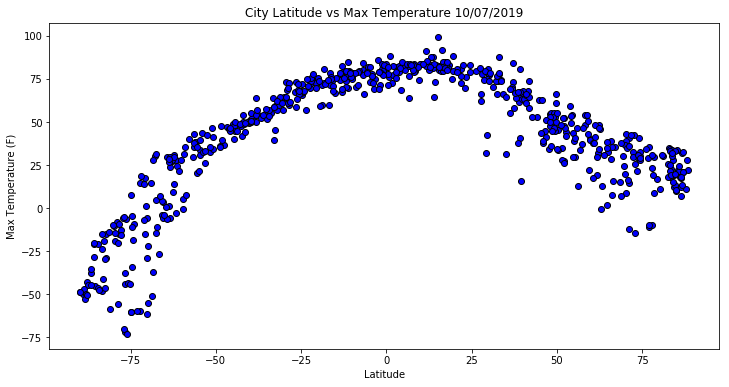

In [6]:
# Latitude vs. Temperature Plot
lat_temp = weather_df.copy()[['lat', 'max_temp']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_temp['lat'], lat_temp['max_temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Max Temperature 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../WeatherPy/City-Latitude-vs-Max-Temperature.png")
plt.show()

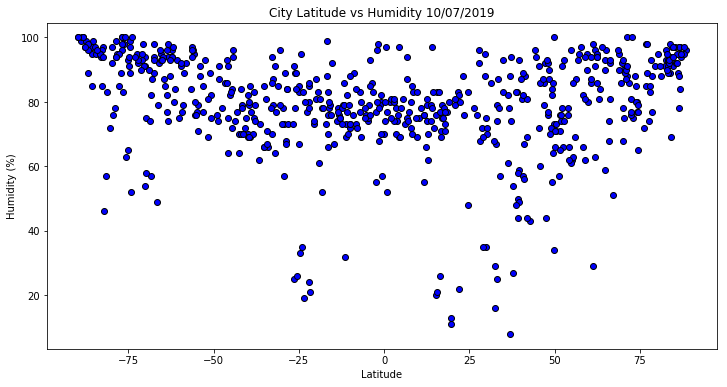

In [7]:
# Latitude vs. Humidity Plot
lat_humidity = weather_df.copy()[['lat', 'humidity']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_humidity['lat'], lat_humidity['humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Humidity 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/City-Latitude-vs-Humidity.png")
plt.show()

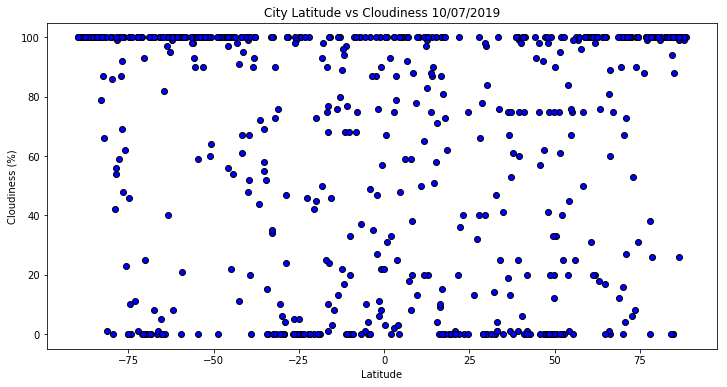

In [8]:
# Latitude vs. Humidity Plot
lat_cloudiness = weather_df.copy()[['lat', 'cloudiness']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_cloudiness['lat'], lat_cloudiness['cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Cloudiness 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/City-Latitude-vs-Cloudiness.png")
plt.show()

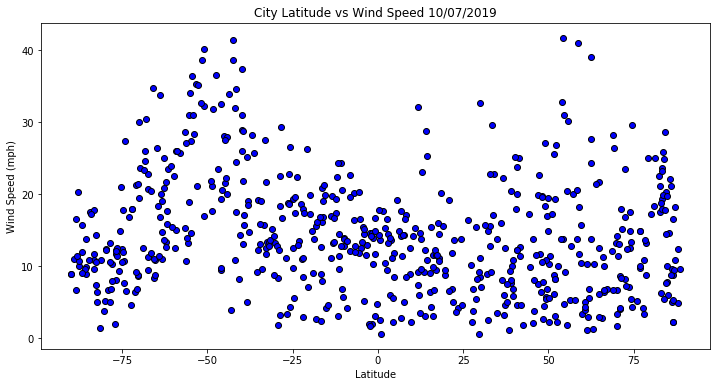

In [9]:
# Latitude vs. Windspeed Plot
lat_wind_speed = weather_df.copy()[['lat', 'max_speed']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_wind_speed['lat'], lat_wind_speed['max_speed'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Wind Speed 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../WeatherPy/City-Latitude-vs-Wind-Speed.png")
plt.show()